Part 3: Feature Matching
This task is based on SIFT feature detection and desciption, and to try different feature matching methods.

We have provided the whole pipeline for SIFT+Feature Matching
https://github.com/allan-tulane/CMPS4661-6663/blob/main/SIFT_OpenCV.ipynb


For the below code, we use SIFT to obtain the detected and described features, the next step is to write code to match them (i.e., given a feature in one image, find the best matching feature in another image).

The simplest approach is the following: compare two features and calculate a scalar distance between them. The best match is the feature with the smallest distance. You will implement two distance functions:
*   **Sum of squared differences (SSD)**: https://en.wikipedia.org/wiki/Euclidean_distance
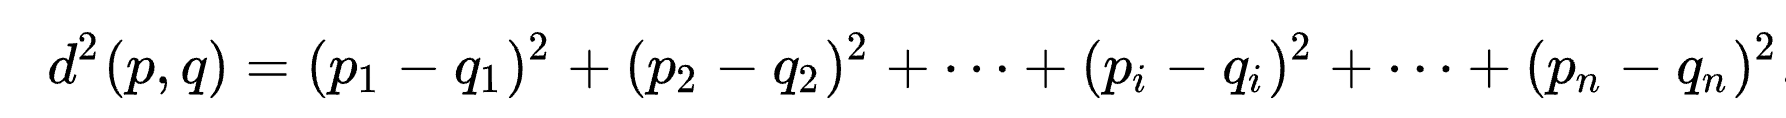
*   **The ratio test distance**: Find the closest and second closest features by SSD distance. The ratio test distance is their ratio (i.e., SSD distance of the closest feature match divided by SSD distance of the second closest feature match).


In [1]:
## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


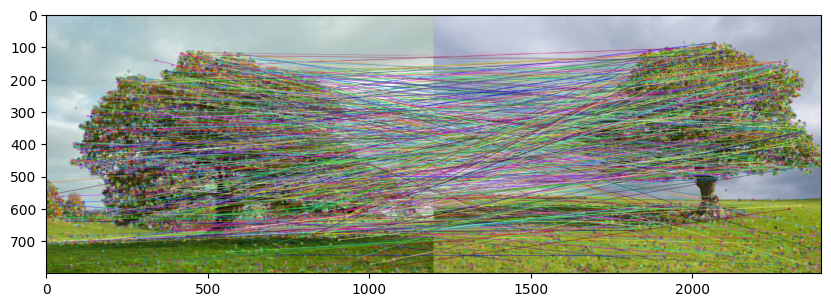

[ 40.  21.   2.   0.   1.   1.   0.  21. 117.  51.   0.   0.   0.   0.
   0.  13. 166.  61.   0.   0.   0.   0.   1.  38.  98.  13.   0.   0.
   1.   1.  32.  80.  29.   0.   0.   1.   5.   2.   3. 102.  91.  36.
   8.  10.  13.   3.   3.  28. 166.  40.   1.   0.   0.   0.   0.  22.
 166.  32.   6.   6.   3.   2.   8.  18.  60.   2.   0.   0.   9.  21.
   7.  50.  88.   6.   2.   4.  26.  46.  10.  24. 166.  39.   0.   0.
   0.   0.   1.  38. 166.  51.   3.   1.   0.   0.   2.  11.  34.   1.
   0.   0.   2.   8.   2.   8.  31.   3.   0.   0.  13.  20.   2.   3.
 156.  35.   0.   0.   0.   0.   0.   3.  73.  17.   1.   0.   0.   0.
   0.  10.]
7331
5.148344039916992 651.1902465820312


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/My Drive/Colab Notebooks/Assignment2/'

train_img = cv2.imread(img_path+'Tree1.jpeg')
query_img = cv2.imread(img_path+'Tree2.jpeg')
train_img= cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)
query_img= cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)
if train_img.shape != query_img.shape:
    query_img = cv2.resize(query_img, (train_img.shape[1], train_img.shape[0]))
# Turn Images to grayscale

def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

train_img_gray = to_gray(train_img)
query_img_gray = to_gray(query_img)

# Initialise SIFT detector
sift = cv2.SIFT_create()

# Generate SIFT keypoints and descriptors
train_kp, train_desc = sift.detectAndCompute(train_img_gray, None)
query_kp, query_desc = sift.detectAndCompute(query_img_gray, None)

## TODO

## Now you have the keypoint, descriptor for train/query images. You need to implment your own feature matching method.




def ssd(desc1, desc2):
    return np.sum((desc1 - desc2) ** 2)

def ssdmatch(train_desc, query_desc):
    matche = []
    for i, query_d in enumerate(query_desc):

        distances = [ssd(query_d, train_d) for train_d in train_desc]

        best_match_idx = np.argmin(distances)
        matche.append((i, best_match_idx))

    return matche


def ratiotest(train_desc, query_desc):
    bestmatch = []
    for i, query_d in enumerate(query_desc):
        distances = [ssd(train_d, query_d) for train_d in train_desc]
        sorted_idx = np.argsort(distances)
        best0 = sorted_idx[0]
        best1 = sorted_idx[1]
        if distances[best0] < 0.75 * distances[best1]:
            bestmatch.append((i, best0))

    return bestmatch
## demo code for reference
ssd_matches = ssdmatch(train_desc, query_desc)

ratio_matches = ratiotest(train_desc, query_desc)

matches_to_draw = [cv2.DMatch(_queryIdx=m[0], _trainIdx=m[1], _distance=0) for m in ratio_matches]
matched_img = cv2.drawMatches(query_img, query_kp, train_img, train_kp, matches_to_draw, None)

plt.figure(figsize=(10,10))
plt.imshow(matched_img)
plt.show()


##print the 128-dim feature for one keypoint in train image
print(train_desc[0,:])


##print the size of keypoints for train image
print(len(train_kp))

## pick the keypoint with index 1 and obtain the x,y coordinater
(x,y) = train_kp[1].pt
print(x, y)


